<div style="background-color: rgba(238, 238, 238, 0.6); padding: 10px; margin-left: 80%"><span style="display: block; color: black; font-size: 24px; text-align: right; font-weight: bold; text-shadow: 2px 2px 4px #999999;">Data Preparation CA<br><br></span><span style="display: block; color: black; text-align: right; font-weight: bold; text-shadow: 2px 2px 4px #999999;">Zygimantas Jakubauskas<br></span></div>

<span style="color: blue;">

## Table of contents:
</span>

* [Introduction](#first-bullet)
* [1. Getting familiar with the dataset](#second-bullet)
** [1.1. Data dictionary](#eight-bullet)
* [2. Exploratory data analysis (EDA)](#third-bullet)
** [2.1. Findings of EDA](#forth-bullet)   
* [3. Data cleaning](#fifth-bullet)    
* [4. Principal components analysis](#6th-bullet)       

<span style="color: blue;">

## Introduction <a class="anchor" id="first-bullet"></a>

</span>

<span style="color: blue;">

### 1. Getting familiar with the dataset <a class="anchor" id="second-bullet"></a>

</span>

The dataset for this project is "aps_failure_set", based on data collected from heavy Scania trucks with the focus on Air Pressure System (APS). There are two classes - Negative and Positive, where Positive class denotes failures of APS system.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 

In [2]:
df = pd.read_csv("aps_failure_set.csv")

I'm displaying all the columns (171 of them) and looking at first 5 observations in full.

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

<span style="color: blue;">

### 1.1 Data dictionary <a class="anchor" id="eight-bullet"></a>
    
</span>

__Class__ - There are two values of the Class - negative and positive. Negative consists of trucks, that have failed components of the APS system. 
Positive class consists of trucks that have other failed components, not of APS system. 

__All other variables__ - Data passed by the sensors in the trucks.

<span style="color: blue;">

## 2. Exploratory data analysis <a class="anchor" id="third-bullet"></a>
    
</span>

Exploratory data analysis (EDA) is an early look at the dataset. The goal of EDA is to understand the data.

I start with checking of dataset dimensions.

In [88]:
df.shape

(60000, 171)

Looking at the types of the values.

In [8]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    class   object
 1    aa_000  int64 
 2    ab_000  object
 3    ac_000  object
 4    ad_000  object
 5    ae_000  object
 6    af_000  object
 7    ag_000  object
 8    ag_001  object
 9    ag_002  object
 10   ag_003  object
 11   ag_004  object
 12   ag_005  object
 13   ag_006  object
 14   ag_007  object
 15   ag_008  object
 16   ag_009  object
 17   ah_000  object
 18   ai_000  object
 19   aj_000  object
 20   ak_000  object
 21   al_000  object
 22   am_0    object
 23   an_000  object
 24   ao_000  object
 25   ap_000  object
 26   aq_000  object
 27   ar_000  object
 28   as_000  object
 29   at_000  object
 30   au_000  object
 31   av_000  object
 32   ax_000  object
 33   ay_000  object
 34   ay_001  object
 35   ay_002  object
 36   ay_003  object
 37   ay_004  object
 38   ay_005  object
 39   ay_006  object
 40   ay

After asking to show all the colums of the dataset, i can see that only column "aa_000" doesn't have other values but numbers. All other colums have something else beside, not just numbers. The
next piece of code confirms it, as it is the only column, where statistical values, such as mean value, or standard deviation can be calculated.

In [90]:
df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


As i know, that column "aa_000" only contains integers, i want to explore what types of data can be in other columns. I'm checking 
what values contains column "ab_000".

In [10]:
df["ab_000"].unique()

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

In [11]:
df["ab_000"].value_counts()

na     46329
0      10977
2       1937
4        420
6        148
8         65
10        35
12        28
14        12
16         7
24         6
18         5
26         4
34         3
100        3
20         3
22         3
58         2
28         2
52         1
90         1
204        1
30         1
36         1
134        1
48         1
32         1
44         1
46         1
68         1
Name: ab_000, dtype: int64

It's a big dataset, checking if there are any duplicates in observations.

In [95]:
df.duplicated().value_counts()

False    60000
dtype: int64

I can see that column contains missing values "na". In fact it has 46329 missing values. I will deal with them in the next chapter.
Next i want to explore the main column "class", which contains the data relevant to this project. 

In [12]:
df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

I can see variable "class" has no missing values, it shows that there are 1000 cases where components of APS system have failed.

I will visualise proportions of the two classes.

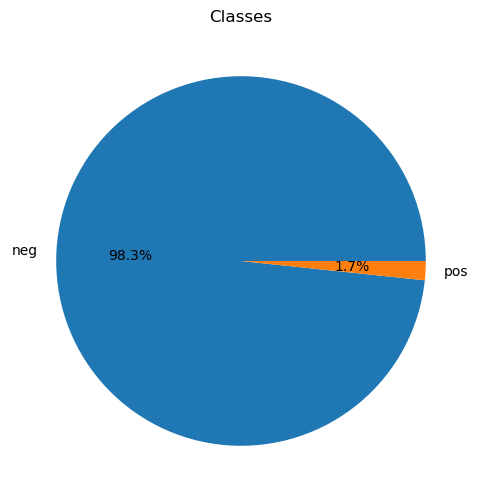

In [91]:
classes = df["class"].value_counts()
plt.figure(figsize=(6, 6))  
plt.pie(classes, labels=classes.index, autopct='%1.1f%%')
plt.title("Classes")
plt.show()

Failure of the APS components occured in 1.7% of all failures.

<span style="color: blue;">

### 2.1 Findings of EDA <a class="anchor" id="forth-bullet"></a>
    
</span>

The dataset has 60000 observations and 171 variables in total. The dataset contains a lot of corrupt values in form of "na" 
and the dataset requires cleaning. There are two types of data - "Class" is categorical and has Nominal level of measurement. All
other variables are continuous and have Ratio level of measurement. Duplicates checked, there are none of them, each observation 
is unique. 

<span style="color: blue;">

## 3. Data cleaning <a class="anchor" id="fifth-bullet"></a>
    
</span>

The scenario asks to focus on the Air Pressure System (APS). The failures of other systems will be dealt by other departments.
With this in mind i'm reducing dataset only keeping parameters within Positive class, as Positive points to APS failure.

In [15]:
# positive_df=df.loc[df["class"]=="pos"]

In [16]:
# positive_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9,pos,153204,0,182,na,0,0,0,0,0,11804,684444,326536,31586,0,0,0,2658638,14346,0,0,29384,46356,5566182,4426834,1571480,1120644,2,0,0,0,1368,862,0,0,0,0,0,0,0,94188,960182,0,250,16,32,146,126,951126,91162,11512,0,0,702994,186172,69282,36640,20698,17720,18586,2278,0,0,7167172,692,152,1690,294,2658638,126990,355360,1215418,263620,263960,253220,260500,270840,na,na,na,255200,153203.49,7167172,7167172,1065896,2169.0,415352,108024,1114900,6785612,1209600,0,na,na,na,14779408.32,5602235.52,6587273.28,0,8,0,0,32854,113024,413450,341800,110462,40426,2354,0,na,0,7167172,0,556,62,11606,370336,119892,399936,149156,2826,0,0,na,na,na,na,na,na,na,na,na,16910,218,0,0,55760,1433920,0,0,0,0,51558,0,0,0,0,0,0,0,0,0,0,0,0,0,1.9,166,512878,293880,129862,26872,34044,22472,34362,0,0,0,0,0
23,pos,453236,na,2926,na,0,0,0,0,222,323436,2999280,20657518,12530224,913700,12670,0,18489312,19038,0,na,117902,203782,32633282,28658284,5348896,3667892,0,0,0,0,24514,1858,2273870,2608460,1424956,1607946,1409344,2051868,2227058,8113476,15720072,0,28828,33264,47402,627172,26128758,10570790,804,22,8,2,12630142,9040546,7110184,4970218,2616558,886208,160242,22100,842,10,38100406,632,1686,2018,684,18489312,447850,2507262,2827898,366980,314860,176220,232680,162300,189300,187600,189400,190440,453236.92,38100374,38100374,37843756,189372,8436120,na,565520,37437050,1209600,0,na,na,na,33480473.28,0,3935856.96,na,na,0,24598,523608,11350372,19808010,5225236,439104,59042,6950,130,na,42,38100374,na,16738,3392,1441482,1867216,1513156,21289878,11184234,120904,50,0,na,na,na,na,na,na,na,na,na,18132,2442,0,0,0,0,0,0,0,0,260830,169964,26740,73289586,16623244,1056682,155406,93686740,28423762,7966,382610,0,0,432739640,na,na,4079752,13176956,7908038,3026002,5025350,2025766,1160638,533834,493800,6914,0,0
60,pos,72504,na,1594,1052,0,0,0,244,178226,1249396,3813464,4876588,1202196,80186,5892,1154,na,na,na,na,na,na,na,na,na,na,0,na,na,na,6488,1414,0,0,0,0,0,0,605072,8238656,2563618,0,8592,7120,15282,23666,1102276,10250396,14,0,0,0,7118800,2398182,787330,396066,243178,157416,110850,103378,72600,19546,na,366,234,90,4,na,na,na,na,na,na,na,na,na,na,na,na,na,72504.05,na,na,11636426,35035.0,1402,na,na,11407346,na,290216,0,1180,0,5581807.68,0,5817712.32,150,780,27232,622982,2436254,5437272,2478172,372132,28154,4912,236,0,8,16,na,na,6672,1154,2769170,2753324,3317804,2547452,11770,0,0,0,2210,3508,5359592,113530,0,6,0,0,5805990,14806,4982,0,0,0,0,0,0,0,0,na,42400,7362,0,0,339296,53004,88760,10772,0,0,0,0,1550150,2365.36,2720,5935440,2161030,1432098,372252,527514,358274,332818,284178,3742,0,0,0
115,pos,762958,na,na,na,na,na,776,281128,2186308,8123016,18022646,17301098,6753568,649400,33662,0,14649948,0,0,na,5043850,7995294,30556606,30750228,11311258,4023056,na,0,0,0,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,132489

In [17]:
# positive_df.shape

(1000, 171)

This new filtered dataframe has only 1000 observations, all with failures within APS system. 

In [18]:
# positive_df["ab_000"].value_counts()

na    771
0     155
2      38
4      17
6       9
8       5
12      1
36      1
48      1
14      1
10      1
Name: ab_000, dtype: int64

In [19]:
# positive_df.isna().values.any()

False

Dataset is filled with values marked as "na", which is an object type and before proceeding to PCA these values need to be 
converted to "NaN".

In [96]:
mvf = ["na"]

In [97]:
clean_df = pd.read_csv("aps_failure_set.csv", na_values=mvf)

In [98]:
clean_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

In [99]:
clean_df.shape

(60000, 171)

I have new dataset, which is cleaned and all "na" values are now replaced with NaN. Checking if the types of values have changed.

In [28]:
clean_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype  
---   ------  -----  
 0    class   object 
 1    aa_000  int64  
 2    ab_000  float64
 3    ac_000  float64
 4    ad_000  float64
 5    ae_000  float64
 6    af_000  float64
 7    ag_000  float64
 8    ag_001  float64
 9    ag_002  float64
 10   ag_003  float64
 11   ag_004  float64
 12   ag_005  float64
 13   ag_006  float64
 14   ag_007  float64
 15   ag_008  float64
 16   ag_009  float64
 17   ah_000  float64
 18   ai_000  float64
 19   aj_000  float64
 20   ak_000  float64
 21   al_000  float64
 22   am_0    float64
 23   an_000  float64
 24   ao_000  float64
 25   ap_000  float64
 26   aq_000  float64
 27   ar_000  float64
 28   as_000  float64
 29   at_000  float64
 30   au_000  float64
 31   av_000  float64
 32   ax_000  float64
 33   ay_000  float64
 34   ay_001  float64
 35   ay_002  float64
 36   ay_003  float64
 37   ay_004  float64
 38   ay_0

Dataset now contains no "object" type values, therefore i can proceed. 

Next i'm going visualise variables sorted by percentage of missing values in them. To do this i'm using plotly interactive graph.

In [103]:
visual = (clean_df.isna().sum() / df.shape[0] * 100).to_frame().reset_index()
visual.columns = ["Variables", "Missing Value Percentage"]
visual = visual.sort_values(by="Missing Value Percentage", ascending=False)

fig = px.bar(
    visual,
    x="Variables",
    y="Missing Value Percentage",
    title="Visualisation of Missing Values by Variables in Percentages",
    labels={"Variables": "Variables", "Missing Value Percentage": "Percentage of missing values"},
)

fig.show()

The visual shows that there are 8 colums with more than 65% values missing. The two colums with 45% and 38% of values missing, and the
rest has below 25% of values missing. I'm taking decision to drop all the colums with highest percentages of missing values. 
Treshhold - 65%.

In [27]:
dropped_df = clean_df.drop(columns = ["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000", "bm_000"])
dropped_df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,28000.0,41040.08,2673338.0,2673338.0,2678534.0,15439.0,7466.0,22436.0,248240.0,2560566.0,1209600.0,63328.0,0.0,124.0,0.0,2322692.16,0.0,2360

In [30]:
dropped_df.shape

(60000, 163)

My new dataset has now 163 variables.

<span style="color: blue;">

## 4. Principal component analysis <a class="anchor" id="6th-bullet"></a>
    
</span>

In [31]:
from sklearn.decomposition import PCA

In [32]:
positive_df=dropped_df.loc[dropped_df["class"]=="pos"]

In [33]:
positive_df.shape

(1000, 163)

In [34]:
positive_df_encoded = pd.get_dummies(data=positive_df,drop_first=True)
positive_df_encoded

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9,153204,182.0,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,0.0,2658638.0,14346.0,0.0,0.0,29384.0,46356.0,5566182.0,4426834.0,1571480.0,1120644.0,2.0,0.0,0.0,0.0,1368.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94188.0,960182.0,0.0,250.0,16.0,32.0,146.0,126.0,951126.0,91162.0,11512.0,0.0,0.0,702994.0,186172.0,69282.0,36640.0,20698.0,17720.0,18586.0,2278.0,0.0,0.0,7167172.0,692.0,152.0,1690.0,294.0,2658638.0,126990.0,355360.0,1215418.0,263620.0,263960.0,255200.0,153203.49,7167172.0,7167172.0,1065896.0,2169.0,415352.0,108024.0,1114900.0,6785612.0,1209600.0,0.0,NaN,NaN,NaN,14779408.32,5602235.52,6587273.28,0.0,8.0,0.0,0.0,32854.0,113024.0,413450.0,341800.0,110462.0,40426.0,2354.0,0.0,NaN,0.0,7167172.0,556.0,62.0,11606.0,370336.0,119892.0,399936.0,149156.0,2826.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16910.0,218.0,0.0,0.0,55760.0,1433920.0,0.0,0.0,0.0,0.0,51558.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,166.0,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
23,453236,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,0.0,18489312.0,19038.0,0.0,NaN,117902.0,203782.0,32633282.0,28658284.0,5348896.0,3667892.0,0.0,0.0,0.0,0.0,24514.0,1858.0,2273870.0,2608460.0,1424956.0,1607946.0,1409344.0,2051868.0,2227058.0,8113476.0,15720072.0,0.0,28828.0,33264.0,47402.0,627172.0,26128758.0,10570790.0,804.0,22.0,8.0,2.0,12630142.0,9040546.0,7110184.0,4970218.0,2616558.0,886208.0,160242.0,22100.0,842.0,10.0,38100406.0,632.0,1686.0,2018.0,684.0,18489312.0,447850.0,2507262.0,2827898.0,366980.0,314860.0,190440.0,453236.92,38100374.0,38100374.0,37843756.0,189372.0,8436120.0,NaN,565520.0,37437050.0,1209600.0,0.0,NaN,NaN,NaN,33480473.28,0.00,3935856.96,NaN,NaN,0.0,24598.0,523608.0,11350372.0,19808010.0,5225236.0,439104.0,59042.0,6950.0,130.0,NaN,42.0,38100374.0,16738.0,3392.0,1441482.0,1867216.0,1513156.0,21289878.0,11184234.0,120904.0,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18132.0,2442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260830.0,169964.0,26740.0,7.328959e+07,16623244.0,1056682.0,155406.0,93686740.0,28423762.0,7966.0,382610.0,0.0,0.0,432739640.0,NaN,NaN,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
60,72504,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,1154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6488.0,1414.0,0.0,0.0,0.0,0.0,0.0,0.0,605072.0,8238656.0,2563618.0,0.0,8592.0,7120.0,15282.0,23666.0,1102276.0,10250396.0,14.0,0.0,0.0,0.0,7118800.0,2398182.0,787330.0,396066.0,243178.0,157416.0,110850.0,103378.0,72600.0,19546.0,NaN,366.0,234.0,90.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72504.05,NaN,NaN,11636426.0,35035.0,1402.0,NaN,NaN,11407346.0,NaN,290216.0,0.0,1180.0,0.0,5581807.68,0.00,5817712.32,150.0,780.0,27232

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy='median')

In [37]:
positive_df_encoded = pd.DataFrame(imputer.fit_transform(positive_df_encoded), columns=positive_df_encoded.columns)

In [38]:
positive_df_encoded.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204.0,182.0,648.0,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,0.0,2658638.0,14346.0,0.0,0.0,29384.0,46356.0,5566182.0,4426834.0,1571480.0,1120644.0,2.0,0.0,0.0,0.0,1368.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94188.0,960182.0,0.0,250.0,16.0,32.0,146.0,126.0,951126.0,91162.0,11512.0,0.0,0.0,702994.0,186172.0,69282.0,36640.0,20698.0,17720.0,18586.0,2278.0,0.0,0.0,7167172.0,692.0,152.0,1690.0,294.0,2658638.0,126990.0,355360.0,1215418.0,263620.0,263960.0,255200.0,153203.49,7167172.0,7167172.0,1065896.0,2169.0,415352.0,108024.0,1114900.0,6785612.0,1209600.0,0.0,0.0,306.0,0.0,14779408.32,5602235.52,6587273.28,0.0,8.0,0.0,0.0,32854.0,113024.0,413450.0,341800.0,110462.0,40426.0,2354.0,0.0,254.0,0.0,7167172.0,556.0,62.0,11606.0,370336.0,119892.0,399936.0,149156.0,2826.0,0.0,0.0,1267.0,2837.0,10593592.0,2949112.0,0.0,7459.0,0.0,0.0,12003037.0,16910.0,218.0,0.0,0.0,55760.0,1433920.0,0.0,0.0,0.0,0.0,51558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,166.0,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,453236.0,2926.0,648.0,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,0.0,18489312.0,19038.0,0.0,0.0,117902.0,203782.0,32633282.0,28658284.0,5348896.0,3667892.0,0.0,0.0,0.0,0.0,24514.0,1858.0,2273870.0,2608460.0,1424956.0,1607946.0,1409344.0,2051868.0,2227058.0,8113476.0,15720072.0,0.0,28828.0,33264.0,47402.0,627172.0,26128758.0,10570790.0,804.0,22.0,8.0,2.0,12630142.0,9040546.0,7110184.0,4970218.0,2616558.0,886208.0,160242.0,22100.0,842.0,10.0,38100406.0,632.0,1686.0,2018.0,684.0,18489312.0,447850.0,2507262.0,2827898.0,366980.0,314860.0,190440.0,453236.92,38100374.0,38100374.0,37843756.0,189372.0,8436120.0,62370.0,565520.0,37437050.0,1209600.0,0.0,0.0,306.0,0.0,33480473.28,0.00,3935856.96,267.0,1609.0,0.0,24598.0,523608.0,11350372.0,19808010.0,5225236.0,439104.0,59042.0,6950.0,130.0,254.0,42.0,38100374.0,16738.0,3392.0,1441482.0,1867216.0,1513156.0,21289878.0,11184234.0,120904.0,50.0,0.0,1267.0,2837.0,10593592.0,2949112.0,0.0,7459.0,0.0,0.0,12003037.0,18132.0,2442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260830.0,169964.0,26740.0,73289586.0,16623244.0,1056682.0,155406.0,93686740.0,28423762.0,7966.0,382610.0,0.0,0.0,432739640.0,7566.64,7353.0,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,72504.0,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,1154.0,17783922.0,10445.0,0.0,0.0,602704.0,1043431.0,33124476.0,28430622.0,11195058.0,4631158.0,0.0,0.0,0.0,0.0,6488.0,1414.0,0.0,0.0,0.0,0.0,0.0,0.0,605072.0,8238656.0,2563618.0,0.0,8592.0,7120.0,15282.0,23666.0,1102276.0,10250396.0,14.0,0.0,0.0,0.0,7118800.0,2398182.0,787330.0,396066.0,243178.0,157416.0,110850.0,103378.0,72600.0,19546.0,47370562.0,366.0,234.0,90.0,4.0,17711194.0,583122.0,4381828

In [39]:
pca = PCA()
fit = pca.fit_transform(positive_df_encoded)

In [40]:
pca.explained_variance_

array([1.49099395e+17, 6.74122469e+16, 2.04701279e+16, 6.76437914e+15,
       1.91892626e+15, 1.29333473e+15, 6.14911808e+14, 3.11065906e+14,
       1.96222896e+14, 1.72188348e+14, 1.59483264e+14, 1.39417501e+14,
       1.24300665e+14, 1.16535833e+14, 8.97856615e+13, 8.25922357e+13,
       7.53235762e+13, 4.85599969e+13, 3.95823865e+13, 3.18906730e+13,
       2.86406919e+13, 2.23525652e+13, 2.06320817e+13, 1.90888065e+13,
       1.72815910e+13, 1.65457410e+13, 1.46415127e+13, 1.44626319e+13,
       1.18226829e+13, 1.08355052e+13, 1.02520138e+13, 9.40144798e+12,
       8.70081786e+12, 8.38232915e+12, 7.76897301e+12, 7.36500403e+12,
       6.80845500e+12, 6.39387728e+12, 5.60953670e+12, 5.43846346e+12,
       4.80952988e+12, 4.44113008e+12, 4.14010364e+12, 3.70671310e+12,
       3.52274237e+12, 3.04147252e+12, 2.98870587e+12, 2.93972404e+12,
       2.87564160e+12, 2.44877386e+12, 2.31367487e+12, 2.19008816e+12,
       1.92021551e+12, 1.65865114e+12, 1.60630381e+12, 1.45654927e+12,
      

In [41]:
pca.explained_variance_ratio_

array([5.97657051e-01, 2.70218431e-01, 8.20534263e-02, 2.71146565e-02,
       7.69191457e-03, 5.18426397e-03, 2.46484150e-03, 1.24689125e-03,
       7.86549113e-04, 6.90207898e-04, 6.39280237e-04, 5.58847689e-04,
       4.98252648e-04, 4.67127729e-04, 3.59901081e-04, 3.31066614e-04,
       3.01930576e-04, 1.94650183e-04, 1.58663906e-04, 1.27832078e-04,
       1.14804701e-04, 8.95990768e-05, 8.27026096e-05, 7.65164727e-05,
       6.92723446e-05, 6.63227290e-05, 5.86897302e-05, 5.79726962e-05,
       4.73906000e-05, 4.34335502e-05, 4.10946557e-05, 3.76852076e-05,
       3.48767688e-05, 3.36001236e-05, 3.11415179e-05, 2.95222296e-05,
       2.72913322e-05, 2.56295193e-05, 2.24855316e-05, 2.17997935e-05,
       1.92787465e-05, 1.78020354e-05, 1.65953867e-05, 1.48581636e-05,
       1.41207267e-05, 1.21915819e-05, 1.19800696e-05, 1.17837285e-05,
       1.15268575e-05, 9.81578066e-06, 9.27424352e-06, 8.77885271e-06,
       7.69708244e-06, 6.64861549e-06, 6.43878398e-06, 5.83850080e-06,
      

In [42]:
pca.components_[0,]

array([ 1.05478271e-04, -2.60138940e-02,  4.86311366e-07,  5.32043731e-08,
        1.08627814e-07, -7.47409163e-07,  7.25846862e-06,  2.31095817e-04,
        1.75222754e-03,  4.10297634e-03,  2.30783889e-03, -2.36034158e-03,
       -7.08538921e-04,  1.19189819e-06, -3.69699265e-05,  2.66111116e-03,
       -4.06990662e-05, -2.83922336e-06, -3.41105689e-06,  1.20310508e-03,
        1.68896187e-03,  3.39073847e-03,  4.02687358e-03,  2.44010293e-03,
        2.88682371e-04,  4.82239369e-10,  7.36668033e-06, -4.83821933e-05,
       -4.59362073e-06,  2.91422649e-06,  1.38056332e-06,  2.63308574e-04,
       -1.38504864e-05, -1.59249540e-04, -6.34648253e-05, -1.85022829e-04,
       -8.70481324e-04, -1.56390411e-03,  4.76069362e-04,  7.42695970e-03,
        1.09513928e-05,  3.02333159e-05,  1.86445719e-05,  1.87870210e-05,
       -1.03886902e-04,  1.00161961e-04,  4.80244586e-03,  2.90969717e-04,
        1.46688061e-04,  8.78869648e-07, -4.47209336e-08, -2.08183377e-04,
        2.68949758e-03,  

In [43]:
pca.n_components_

162

In [44]:
pca2 = PCA(.995)
fit = pca2.fit_transform(positive_df_encoded)
pca2.explained_variance_

array([1.49099395e+17, 6.74122469e+16, 2.04701279e+16, 6.76437914e+15,
       1.91892626e+15, 1.29333473e+15, 6.14911808e+14, 3.11065906e+14,
       1.96222896e+14, 1.72188348e+14])

In [45]:
# Calculate explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Define the desired threshold (e.g., 95% of total variance)
threshold = 0.995

# Determine the number of components to retain
num_components_to_retain = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to retain for {threshold * 100}% of variance: {num_components_to_retain}")

Number of components to retain for 99.5% of variance: 10


In [46]:
positive_df_encoded.shape

(1000, 162)

Text(0, 0.5, 'Eigenvalue')

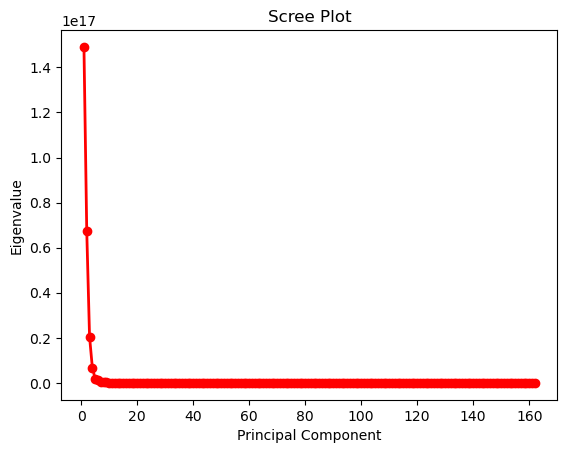

In [47]:
principal_component_number = np.arange(162) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [48]:
clean_df.shape

(60000, 171)

In [49]:
clean_df_encoded = pd.get_dummies(data=clean_df,drop_first=True)
clean_df_encoded

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_pos
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.00,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.00,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.

In [50]:
imputer = SimpleImputer(strategy='median')

In [51]:
clean_df_encoded = pd.DataFrame(imputer.fit_transform(clean_df_encoded), columns=clean_df_encoded.columns)

In [52]:
clean_df_encoded.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class_pos
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,288320.0,305100.0,320400.0,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,0.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,251400.0,270660.0,288320.0,305100.0,320400.0,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,2.0,46.0,0.0,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,8.0,0.0,3646660.0,0.0,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,210.0,278.0,1181117.0,44465.0,0.0,202.0,0.0,0.0,1734472.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,1

In [53]:
clean_df_encoded.shape

(60000, 171)

In [54]:
pca = PCA()
fit = pca.fit_transform(clean_df_encoded)

In [55]:
pca.explained_variance_

array([6.03373143e+17, 9.11830381e+15, 3.68450365e+15, 1.91005271e+15,
       7.51902060e+14, 1.08853854e+14, 7.06229031e+13, 2.78652646e+13,
       1.81989063e+13, 1.55754932e+13, 1.23872379e+13, 9.81061342e+12,
       8.90291075e+12, 7.40195477e+12, 5.37214118e+12, 4.61149468e+12,
       3.17780602e+12, 2.68707070e+12, 2.50256224e+12, 1.73746333e+12,
       1.67207680e+12, 1.39666829e+12, 1.24015175e+12, 1.20818676e+12,
       1.10524039e+12, 1.07217516e+12, 9.45310962e+11, 8.81256611e+11,
       7.92339908e+11, 7.14127102e+11, 6.36752078e+11, 5.79108571e+11,
       5.48003461e+11, 5.22128814e+11, 4.81045698e+11, 4.23784171e+11,
       3.81549459e+11, 3.64541233e+11, 3.49890537e+11, 3.13799016e+11,
       3.00004215e+11, 2.88570695e+11, 2.64188126e+11, 2.55869046e+11,
       2.43238073e+11, 2.27105394e+11, 2.03973291e+11, 1.93449208e+11,
       1.85070457e+11, 1.69579368e+11, 1.60662677e+11, 1.40801608e+11,
       1.24086529e+11, 1.20143891e+11, 1.16896681e+11, 1.04073958e+11,
      

In [56]:
pca.explained_variance_ratio_

array([9.74506704e-01, 1.47269535e-02, 5.95083415e-03, 3.08492214e-03,
       1.21439545e-03, 1.75809633e-04, 1.14062903e-04, 4.50051307e-05,
       2.93930156e-05, 2.51559465e-05, 2.00066022e-05, 1.58451013e-05,
       1.43790726e-05, 1.19548817e-05, 8.67653401e-06, 7.44801544e-06,
       5.13246787e-06, 4.33988228e-06, 4.04188306e-06, 2.80617341e-06,
       2.70056775e-06, 2.25575605e-06, 2.00296651e-06, 1.95133992e-06,
       1.78507146e-06, 1.73166787e-06, 1.52676976e-06, 1.42331571e-06,
       1.27970653e-06, 1.15338519e-06, 1.02841695e-06, 9.35317044e-07,
       8.85079246e-07, 8.43289157e-07, 7.76935902e-07, 6.84452931e-07,
       6.16239735e-07, 5.88769784e-07, 5.65107476e-07, 5.06816136e-07,
       4.84536181e-07, 4.66069927e-07, 4.26689692e-07, 4.13253562e-07,
       3.92853305e-07, 3.66797447e-07, 3.29436836e-07, 3.12439412e-07,
       2.98906910e-07, 2.73887283e-07, 2.59485954e-07, 2.27408383e-07,
       2.00411893e-07, 1.94044147e-07, 1.88799585e-07, 1.68089633e-07,
      

In [57]:
pca.components_[0,]

array([-1.19907368e-05, -4.64539518e-12,  9.99989094e-01, -8.01120532e-05,
       -8.66729463e-10, -2.50971475e-09,  4.49629127e-07, -3.22074246e-07,
       -4.38070900e-06, -4.68426995e-05, -1.98242053e-04, -2.49156674e-04,
       -1.76349753e-04, -1.92713868e-05, -2.02118993e-06, -1.18534034e-06,
       -3.59652552e-04, -6.45476901e-07, -5.59705122e-07, -1.52426326e-07,
       -3.06332408e-05, -4.84521946e-05, -6.09397007e-04, -5.49376450e-04,
       -2.55690741e-04, -7.88498613e-05, -2.48636153e-10, -7.00522309e-08,
       -8.69857862e-07, -1.25673465e-07,  1.41240852e-07, -9.86432794e-09,
       -6.35138678e-06, -5.41451224e-06, -5.78932780e-06, -3.77171716e-06,
       -5.53001749e-06, -2.88815711e-05, -7.84747016e-05, -3.41077563e-04,
       -2.17178700e-04, -2.82386298e-07, -2.71905147e-06, -1.62765990e-06,
       -3.09353968e-06, -2.85280183e-05, -4.47894200e-04, -1.87638003e-04,
       -1.19008707e-05, -9.09869350e-06, -3.10290433e-07,  2.20872673e-08,
       -2.83367653e-04, -

In [58]:
pca.n_components_

171

In [59]:
pca2 = PCA(.995)
fit = pca2.fit_transform(positive_df_encoded)
pca2.explained_variance_

array([1.49099395e+17, 6.74122469e+16, 2.04701279e+16, 6.76437914e+15,
       1.91892626e+15, 1.29333473e+15, 6.14911808e+14, 3.11065906e+14,
       1.96222896e+14, 1.72188348e+14])

In [60]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
threshold = 0.995
num_components_to_retain = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to retain for {threshold * 100}% of variance: {num_components_to_retain}")

Number of components to retain for 99.5% of variance: 3


In [61]:
clean_df_encoded.shape

(60000, 171)

Text(0, 0.5, 'Eigenvalue')

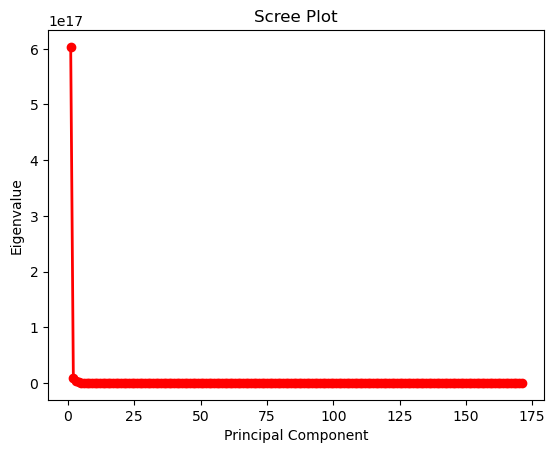

In [62]:
principal_component_number = np.arange(171) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [63]:
clean_positive_df=clean_df.loc[df["class"]=="pos"]

In [64]:
positive_df_encoded = pd.get_dummies(data=clean_positive_df,drop_first=True)
positive_df_encoded

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,0.0,2658638.0,14346.0,0.0,0.0,29384.0,46356.0,5566182.0,4426834.0,1571480.0,1120644.0,2.0,0.0,0.0,0.0,1368.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94188.0,960182.0,0.0,250.0,16.0,32.0,146.0,126.0,951126.0,91162.0,11512.0,0.0,0.0,702994.0,186172.0,69282.0,36640.0,20698.0,17720.0,18586.0,2278.0,0.0,0.0,7167172.0,692.0,152.0,1690.0,294.0,2658638.0,126990.0,355360.0,1215418.0,263620.0,263960.0,253220.0,260500.0,270840.0,NaN,NaN,NaN,255200.0,153203.49,7167172.0,7167172.0,1065896.0,2169.0,415352.0,108024.0,1114900.0,6785612.0,1209600.0,0.0,NaN,NaN,NaN,14779408.32,5602235.52,6587273.28,0.0,8.0,0.0,0.0,32854.0,113024.0,413450.0,341800.0,110462.0,40426.0,2354.0,0.0,NaN,0.0,7167172.0,0.0,556.0,62.0,11606.0,370336.0,119892.0,399936.0,149156.0,2826.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16910.0,218.0,0.0,0.0,55760.0,1433920.0,0.0,0.0,0.0,0.0,51558.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,166.0,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
23,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,0.0,18489312.0,19038.0,0.0,NaN,117902.0,203782.0,32633282.0,28658284.0,5348896.0,3667892.0,0.0,0.0,0.0,0.0,24514.0,1858.0,2273870.0,2608460.0,1424956.0,1607946.0,1409344.0,2051868.0,2227058.0,8113476.0,15720072.0,0.0,28828.0,33264.0,47402.0,627172.0,26128758.0,10570790.0,804.0,22.0,8.0,2.0,12630142.0,9040546.0,7110184.0,4970218.0,2616558.0,886208.0,160242.0,22100.0,842.0,10.0,38100406.0,632.0,1686.0,2018.0,684.0,18489312.0,447850.0,2507262.0,2827898.0,366980.0,314860.0,176220.0,232680.0,162300.0,189300.0,187600.0,189400.0,190440.0,453236.92,38100374.0,38100374.0,37843756.0,189372.0,8436120.0,NaN,565520.0,37437050.0,1209600.0,0.0,NaN,NaN,NaN,33480473.28,0.00,3935856.96,NaN,NaN,0.0,24598.0,523608.0,11350372.0,19808010.0,5225236.0,439104.0,59042.0,6950.0,130.0,NaN,42.0,38100374.0,NaN,16738.0,3392.0,1441482.0,1867216.0,1513156.0,21289878.0,11184234.0,120904.0,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18132.0,2442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260830.0,169964.0,26740.0,7.328959e+07,16623244.0,1056682.0,155406.0,93686740.0,28423762.0,7966.0,382610.0,0.0,0.0,432739640.0,NaN,NaN,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
60,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,1154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6488.0,1414.0,0.0,0.0,0.0,0.0,0.0,0.0,605072.0,8238656.0,2563618.0,0.0,8592.0,7120.0,15282.0,23666.0,1102276.0,10250396.0,14.0,0.0,0.0,0.0,7118800.0,2398182.0,787330.0,396066.0,243178.0,157416.0,110850.0,103378.0,72600.0,19546.0,NaN,366.0,234.0,90

In [65]:
from sklearn.impute import SimpleImputer

In [66]:
imputer = SimpleImputer(strategy='median')

In [67]:
positive_df_encoded = pd.DataFrame(imputer.fit_transform(positive_df_encoded), columns=positive_df_encoded.columns)

In [68]:
positive_df_encoded.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204.0,0.0,182.0,648.0,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,326536.0,31586.0,0.0,0.0,0.0,2658638.0,14346.0,0.0,0.0,29384.0,46356.0,5566182.0,4426834.0,1571480.0,1120644.0,2.0,0.0,0.0,0.0,1368.0,862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94188.0,960182.0,0.0,250.0,16.0,32.0,146.0,126.0,951126.0,91162.0,11512.0,0.0,0.0,702994.0,186172.0,69282.0,36640.0,20698.0,17720.0,18586.0,2278.0,0.0,0.0,7167172.0,692.0,152.0,1690.0,294.0,2658638.0,126990.0,355360.0,1215418.0,263620.0,263960.0,253220.0,260500.0,270840.0,309900.0,306120.0,304480.0,255200.0,153203.49,7167172.0,7167172.0,1065896.0,2169.0,415352.0,108024.0,1114900.0,6785612.0,1209600.0,0.0,0.0,306.0,0.0,14779408.32,5602235.52,6587273.28,0.0,8.0,0.0,0.0,32854.0,113024.0,413450.0,341800.0,110462.0,40426.0,2354.0,0.0,254.0,0.0,7167172.0,0.0,556.0,62.0,11606.0,370336.0,119892.0,399936.0,149156.0,2826.0,0.0,0.0,1267.0,2837.0,10593592.0,2949112.0,0.0,7459.0,0.0,0.0,12003037.0,16910.0,218.0,0.0,0.0,55760.0,1433920.0,0.0,0.0,0.0,0.0,51558.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.90,166.0,512878.0,293880.0,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,453236.0,0.0,2926.0,648.0,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,20657518.0,12530224.0,913700.0,12670.0,0.0,18489312.0,19038.0,0.0,0.0,117902.0,203782.0,32633282.0,28658284.0,5348896.0,3667892.0,0.0,0.0,0.0,0.0,24514.0,1858.0,2273870.0,2608460.0,1424956.0,1607946.0,1409344.0,2051868.0,2227058.0,8113476.0,15720072.0,0.0,28828.0,33264.0,47402.0,627172.0,26128758.0,10570790.0,804.0,22.0,8.0,2.0,12630142.0,9040546.0,7110184.0,4970218.0,2616558.0,886208.0,160242.0,22100.0,842.0,10.0,38100406.0,632.0,1686.0,2018.0,684.0,18489312.0,447850.0,2507262.0,2827898.0,366980.0,314860.0,176220.0,232680.0,162300.0,189300.0,187600.0,189400.0,190440.0,453236.92,38100374.0,38100374.0,37843756.0,189372.0,8436120.0,62370.0,565520.0,37437050.0,1209600.0,0.0,0.0,306.0,0.0,33480473.28,0.00,3935856.96,267.0,1609.0,0.0,24598.0,523608.0,11350372.0,19808010.0,5225236.0,439104.0,59042.0,6950.0,130.0,254.0,42.0,38100374.0,0.0,16738.0,3392.0,1441482.0,1867216.0,1513156.0,21289878.0,11184234.0,120904.0,50.0,0.0,1267.0,2837.0,10593592.0,2949112.0,0.0,7459.0,0.0,0.0,12003037.0,18132.0,2442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260830.0,169964.0,26740.0,73289586.0,16623244.0,1056682.0,155406.0,93686740.0,28423762.0,7966.0,382610.0,0.0,0.0,432739640.0,7566.64,7353.0,4079752.0,13176956.0,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,72504.0,0.0,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,4876588.0,1202196.0,80186.0,5892.0,1154.0,17783922.0,10445.0,0.0,0.0,602704.0,1043431.0,33124476.0,28430622.0,11195058.0,4631158.0,0.0,0.0,0.0,0.0,6488.0,1414.0,0.0,0.0,0.0,0.0,0.0,0.0,605072.0,8238656.0,2563618.0,0.0,8592.0,7120.0,15282.0,23666.0,110

In [69]:
pca = PCA()
fit = pca.fit_transform(positive_df_encoded)

In [70]:
pca.explained_variance_

array([1.49099396e+17, 6.74122475e+16, 2.04701292e+16, 6.76438044e+15,
       1.91892632e+15, 1.29333608e+15, 6.14911864e+14, 3.11068069e+14,
       1.96227979e+14, 1.72194417e+14, 1.59485619e+14, 1.39417825e+14,
       1.24301948e+14, 1.16552546e+14, 8.97905752e+13, 8.26083740e+13,
       7.53237528e+13, 4.85612898e+13, 3.95826124e+13, 3.18921063e+13,
       2.86412053e+13, 2.23529098e+13, 2.06321390e+13, 1.90890511e+13,
       1.72816795e+13, 1.65458647e+13, 1.46416919e+13, 1.44627475e+13,
       1.18228492e+13, 1.08355645e+13, 1.02520403e+13, 9.40147294e+12,
       8.70168391e+12, 8.38253894e+12, 7.76904978e+12, 7.36563759e+12,
       6.80850838e+12, 6.39389754e+12, 5.60961200e+12, 5.43852302e+12,
       4.80960487e+12, 4.44116850e+12, 4.14045732e+12, 3.70677623e+12,
       3.52300491e+12, 3.04148655e+12, 2.98887388e+12, 2.94013695e+12,
       2.87566480e+12, 2.44891005e+12, 2.31370530e+12, 2.19016308e+12,
       1.92029362e+12, 1.65866298e+12, 1.60633575e+12, 1.45659135e+12,
      

In [71]:
pca.explained_variance_ratio_

array([5.97656613e-01, 2.70218235e-01, 8.20533714e-02, 2.71146418e-02,
       7.69190913e-03, 5.18426556e-03, 2.46483992e-03, 1.24689901e-03,
       7.86568913e-04, 6.90231718e-04, 6.39289209e-04, 5.58848579e-04,
       4.98257426e-04, 4.67194382e-04, 3.59920514e-04, 3.31131061e-04,
       3.01931063e-04, 1.94655222e-04, 1.58664695e-04, 1.27837730e-04,
       1.14806674e-04, 8.96003923e-05, 8.27027785e-05, 7.65173968e-05,
       6.92726485e-05, 6.63231759e-05, 5.86904056e-05, 5.79731169e-05,
       4.73912316e-05, 4.34337559e-05, 4.10947319e-05, 3.76852800e-05,
       3.48802147e-05, 3.36009399e-05, 3.11418028e-05, 2.95247476e-05,
       2.72915262e-05, 2.56295817e-05, 2.24858169e-05, 2.18000162e-05,
       1.92790329e-05, 1.78021763e-05, 1.65967923e-05, 1.48584058e-05,
       1.41217687e-05, 1.21916292e-05, 1.19807343e-05, 1.17853750e-05,
       1.15269420e-05, 9.81631936e-06, 9.27435866e-06, 8.77914656e-06,
       7.69738988e-06, 6.64865808e-06, 6.43890728e-06, 5.83866521e-06,
      

In [72]:
pca.components_[0,]

array([ 1.05478272e-04, -9.39883171e-11, -2.60138957e-02,  4.86311373e-07,
        5.32043728e-08,  1.08627814e-07, -7.47409167e-07,  7.25846868e-06,
        2.31095818e-04,  1.75222755e-03,  4.10297638e-03,  2.30783894e-03,
       -2.36034151e-03, -7.08538889e-04,  1.19190324e-06, -3.69699247e-05,
        2.66111119e-03, -4.06990549e-05, -2.83922302e-06, -3.41105678e-06,
        1.20310508e-03,  1.68896188e-03,  3.39073847e-03,  4.02687351e-03,
        2.44010314e-03,  2.88682445e-04,  4.82239369e-10,  7.36668028e-06,
       -4.83821923e-05, -4.59362081e-06,  2.91422647e-06,  1.38056331e-06,
        2.63308589e-04, -1.38504793e-05, -1.59249546e-04, -6.34648268e-05,
       -1.85022832e-04, -8.70481298e-04, -1.56390407e-03,  4.76069458e-04,
        7.42695974e-03,  1.09513928e-05,  3.02333165e-05,  1.86445723e-05,
        1.87870218e-05, -1.03886890e-04,  1.00162085e-04,  4.80244594e-03,
        2.90969719e-04,  1.46688058e-04,  8.78869928e-07, -4.47209358e-08,
       -2.08183269e-04,  

In [73]:
pca.n_components_

170

In [74]:
pca2 = PCA(.995)
fit = pca2.fit_transform(positive_df_encoded)
pca2.explained_variance_

array([1.49099396e+17, 6.74122475e+16, 2.04701292e+16, 6.76438044e+15,
       1.91892632e+15, 1.29333608e+15, 6.14911864e+14, 3.11068069e+14,
       1.96227979e+14, 1.72194417e+14])

In [75]:
positive_df_encoded.shape

(1000, 170)

Text(0, 0.5, 'Eigenvalue')

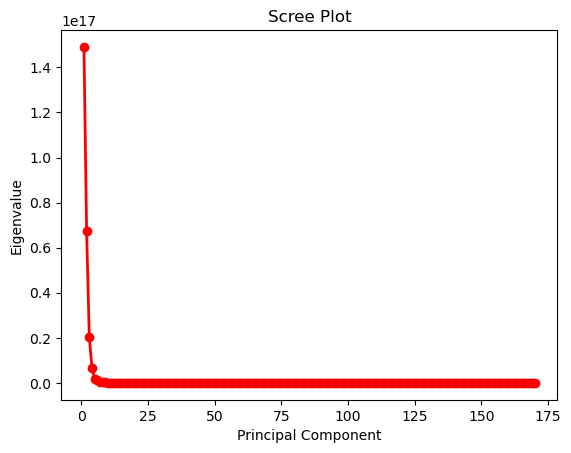

In [76]:
principal_component_number = np.arange(170) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Text(0, 0.5, 'Principal Component')

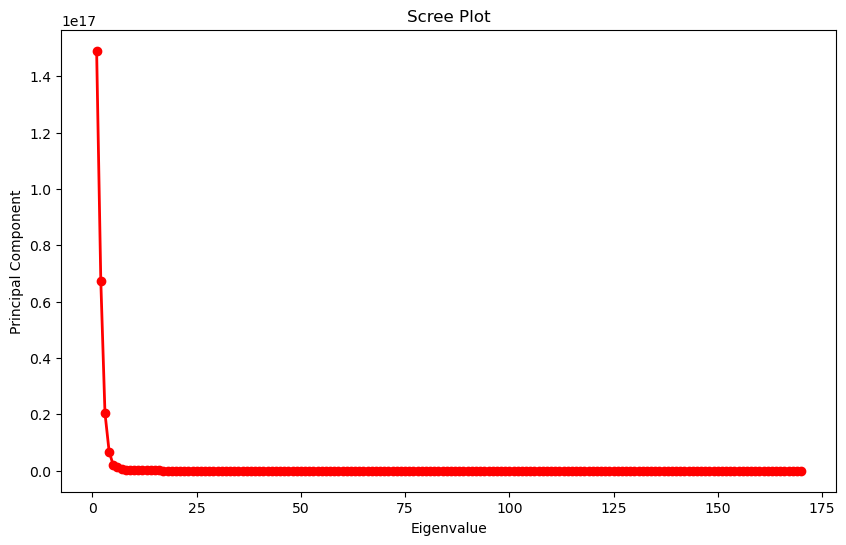

In [77]:
plt.figure(figsize=(10, 6))
principal_component_number = np.arange(170) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Eigenvalue')
plt.ylabel('Principal Component')

In [78]:
x = pca.explained_variance_ratio_
cumulative_explained_variance = x.cumsum()

threshold = 0.95  
num_components_to_retain = len(cumulative_explained_variance[cumulative_explained_variance < threshold]) + 1

print(f"Number of components to retain for {threshold * 100}% of variance: {num_components_to_retain}")

Number of components to retain for 95.0% of variance: 4


In [79]:
x = pca.explained_variance_ratio_
cumulative_explained_variance = x.cumsum()

threshold = 0.995  
num_components_to_retain = len(cumulative_explained_variance[cumulative_explained_variance < threshold]) + 1

print(f"Number of components to retain for {threshold * 100}% of variance: {num_components_to_retain}")

Number of components to retain for 99.5% of variance: 10


Text(0, 0.5, 'Eigenvalue')

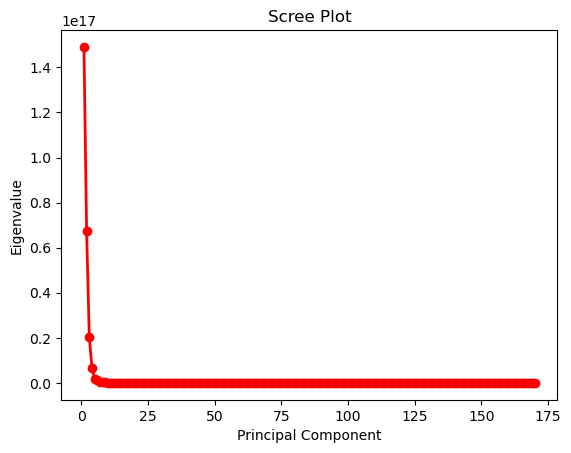

In [80]:
principal_component_number = np.arange(170) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')